######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c37235">Convolutional Neural Network (CNN)
<font color=darkblue>

######  <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#46c335">Import libraries
<font color=darkblue>

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

######  <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#3735c3">Load the Images and split the train and test
<font color=darkblue>


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

Display sample images (2x5)

In [4]:
train_images.shape

(50000, 32, 32, 3)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.1em;color:#3735c3">Making Labels and class names
<font color=darkblue>

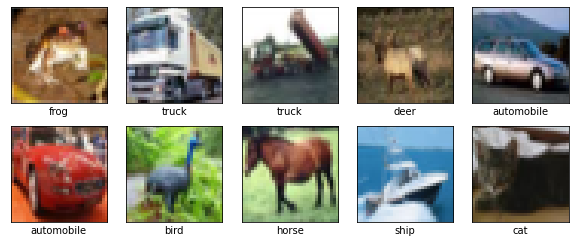

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c33573">Model Architecture
<font color=darkblue>


- Create Convolution base simple and common pattern: CONV2D and MaxPooling2D layers.

- AS a input, CNN takes tensors of shape (image_height, image_width, and color channels) 

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


The above output of CONV2D and MaxPooling2D layer is a 3D tensor of
shape(height,width, and channels.
      
The height and width dimensions tend to shrink as you go in the deeper 
in the network.

Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

ADD Dense layer on Top

To complete our model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification.

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
print("Complete architecture of our model")

Complete architecture of our model


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c33573">Compile and train the model
<font color=darkblue>

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.7526 - accuracy: 0.3540 - val_loss: 1.2277 - val_accuracy: 0.5566
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1778 - accuracy: 0.5814 - val_loss: 1.0745 - val_accuracy: 0.6191
Epoch 3/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.0222 - accuracy: 0.6381 - val_loss: 1.0062 - val_accuracy: 0.6423
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9198 - accuracy: 0.6732 - val_loss: 0.9587 - val_accuracy: 0.6638
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8326 - accuracy: 0.7090 - val_loss: 0.9204 - val_accuracy: 0.6798
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7714 - accuracy: 0.7282 - val_loss: 0.9004 - val_accuracy: 0.6850
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7337 - accuracy: 0.7414 - val_loss: 0.9355 -

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c35935">Evaluate the model
<font color=darkblue>

313/313 - 2s - loss: 0.9193 - accuracy: 0.6973


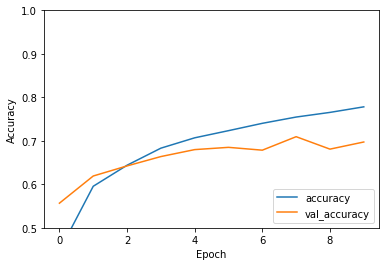

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [12]:
print(test_acc)


0.6973000168800354


In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
test_labels_pred = model.predict(test_images)
test_labels_pred.shape

(10000, 10)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c35935">Prediction using test images 
<font color=darkblue>

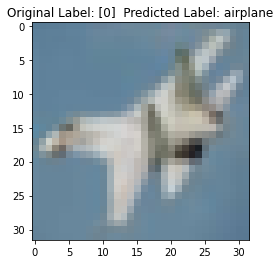

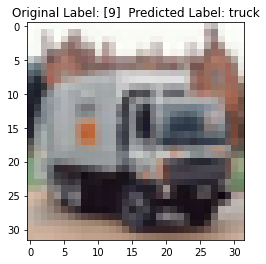

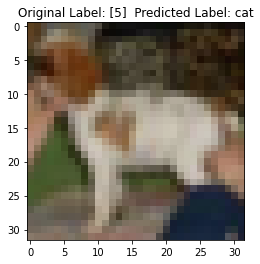

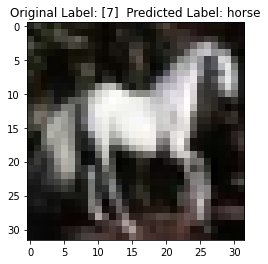

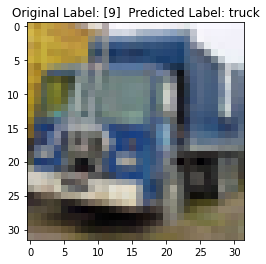

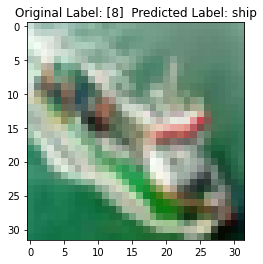

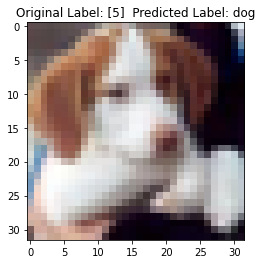

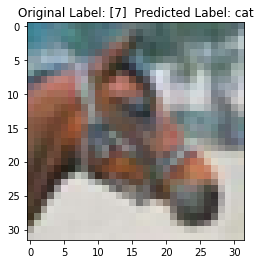

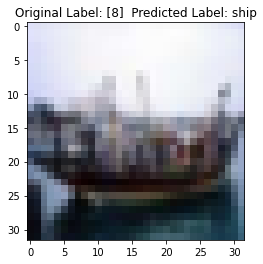

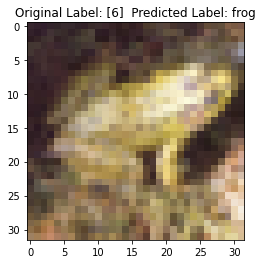

In [14]:
for i in range(10,20):
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    
    #Image name prediction
    image = test_images[i]
    image1 = np.array(image).reshape((1,32,32,3))
    #print(image.shape,image1.shape)
    prediction = model.predict(image1)
    #print(prediction.shape)
    
    score = tf.nn.softmax(prediction[0])
#     print(class_names[np.argmax(score)])
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],class_names[np.argmax(score)]))
    plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c35935">Prediction: export the image and prediction
<font color=darkblue>


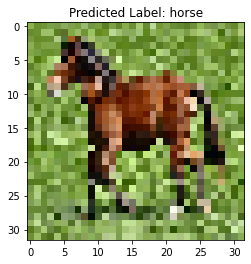

TensorShape([1, 32, 32, 3])

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

timg = "/Users/preethamvignesh/Downloads/horse.jpg"
# timg = "/Users/preethamvignesh/Downloads/deer.jpg"
# timg = "/Users/preethamvignesh/Downloads/dog.jpg"
img = keras.preprocessing.image.load_img(timg, target_size=(32, 32))

plt.imshow(img, cmap=plt.cm.binary)
#change the dimension to train and test data (32x32)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
#Prediction
prediction = model.predict(img_array)
score = tf.nn.softmax(prediction[0])
# print(class_names[np.argmax(score)])
plt.title('Predicted Label: {0}'.format(class_names[np.argmax(score)]))
plt.show()
img_array.shape


In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']